# Conformal geometric algebra

Conformal geometric algebra (CGA) offers an algebra for geometric objects which includes all conformal transformations.

All vectors have a geometric interpretation and can be, e.g., points, spheres, planes, cirles, directions, tangents.
With operations one can construct new obejcts by, e.g., intersecting, joining or transforming objects.
This notebook provides a few elemetary examples how object can be constructed and visualized.

The strong abstraction offers a lot advantages over usual 3D algebra or projective algebra
   - It is a vector algebra: express problems geometrically by using coordinate-free  and dimensionally-independent representations
   - homogenous coordinates: allowing rotation, translation, ... as matrix multiplications
   - quaterions: represent orientation
   - projective geometry: treat infinity as a usual point, e.g., treat lines as circles with infinite radius
   - fast: all operations are matrix multiplications (basically we need to optimize only two operation)
   - simple: geometric problems can be formulated very compact
   - easy understandable (... compared to all alternatives)

In [1]:
# NBVAL_IGNORE_OUTPUT
import numpy as np
import matplotlib.pyplot as plt
from geometricalgebra.viewer import Viewer
from geometricalgebra import cga3d
np.set_printoptions(precision=4)

In [2]:
np.random.seed(1)
path = cga3d.Vector.from_euclid(np.random.random([7, 3]))
path.to_euclid()

array([[4.1702e-01, 7.2032e-01, 1.1437e-04],
       [3.0233e-01, 1.4676e-01, 9.2339e-02],
       [1.8626e-01, 3.4556e-01, 3.9677e-01],
       [5.3882e-01, 4.1919e-01, 6.8522e-01],
       [2.0445e-01, 8.7812e-01, 2.7388e-02],
       [6.7047e-01, 4.1730e-01, 5.5869e-01],
       [1.4039e-01, 1.9810e-01, 8.0074e-01]])

The wedge product of two or more vectors result in an objects which is perpendicular to all vectors. Below you can find a few examples of them

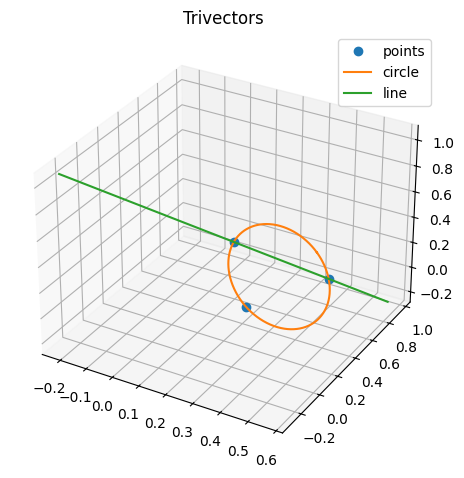

In [3]:
# NBVAL_IGNORE_OUTPUT
fig = plt.figure()
ax = Viewer(fig.add_subplot(111, projection='3d'))

ax.trace_point(path[:3], label='points')
circle = path[0] ^ path[1] ^ path[2]
ax.trace_circle(circle, label='circle')
line = path[0] ^ path[2] ^ cga3d.e_inf
ax.trace_line(line, label='line', length=1)
ax.legend()
ax.set_title("Trivectors")
fig.tight_layout()

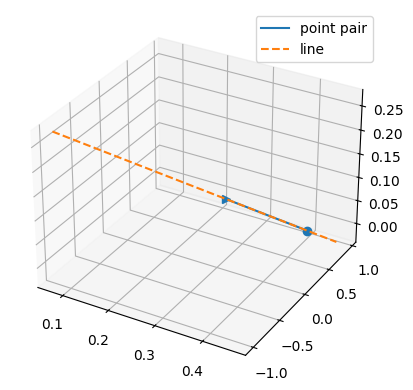

In [4]:
# NBVAL_IGNORE_OUTPUT
fig = plt.figure()
ax = Viewer(fig.add_subplot(111, projection='3d'))
ax.trace_point_pair(path[0] ^ path[1], label='point pair')
line = path[0] ^ path[1] ^ cga3d.e_inf
ax.trace_line(line, length=1, linestyle='--', label='line')
ax.legend()

In [5]:
line

Vector([ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    , -0.1566, -0.1566,  0.0385,  0.0385,
        -0.1147,  0.0665,  0.0665, -0.5736,  0.0922,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ])

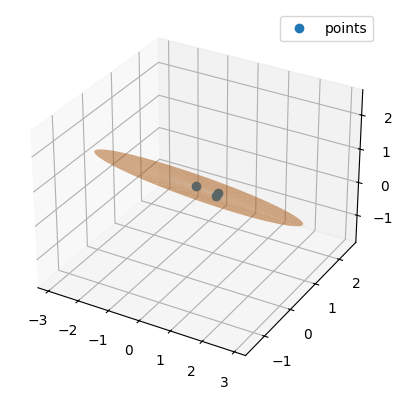

In [6]:
# NBVAL_IGNORE_OUTPUT
fig = plt.figure()
ax = Viewer(fig.add_subplot(111, projection='3d'))
ax.trace_point(path[4:7], label='points')
plane = path[4] ^ path[5] ^ path[6] ^ cga3d.e_inf
ax.trace_plane(plane, radius=3)
ax.legend()

<IPython.core.display.Javascript object>


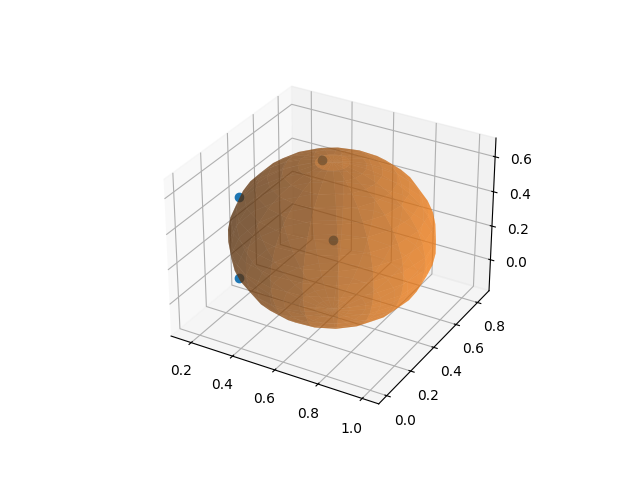

In [7]:
# NBVAL_IGNORE_OUTPUT
%matplotlib notebook
fig = plt.figure()
ax = Viewer(fig.add_subplot(111, projection='3d'))
ax.trace_point(path[:4], label='points')
sphere = path[0] ^ path[1] ^ path[2] ^ path[3]
circle = sphere.meet(plane)
ax.trace_sphere(sphere)

The meet operation gives the intersection of two objects, e.g., the intersection of a sphere and a plane is a circle

<IPython.core.display.Javascript object>


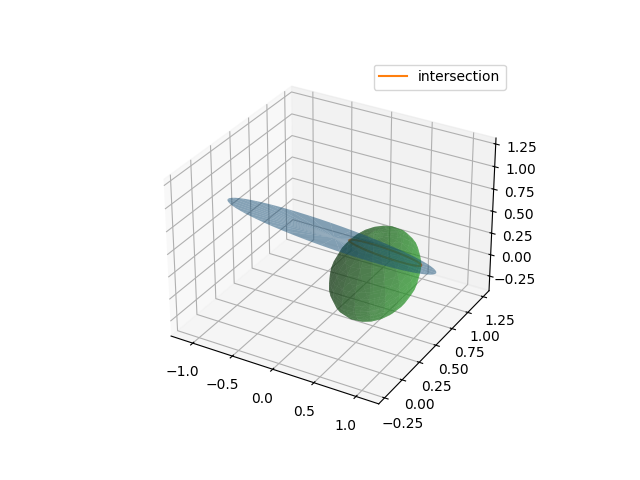

In [8]:
# NBVAL_IGNORE_OUTPUT
fig = plt.figure()
ax = Viewer(fig.add_subplot(111, projection='3d'))
sphere = path[0] ^ path[1] ^ path[2] ^ path[3]
plane = path[4] ^ path[5] ^ path[6] ^ cga3d.e_inf
circle = sphere.meet(plane)
ax.trace_plane(plane, radius=1.3)
ax.trace_circle(circle, label='intersection')
ax.trace_sphere(sphere)
ax.legend()